# **Speed Dating - Matching Classifier**

## Introduction

As a single young man, I have always been curious as to what factors make an attractive person. This curiosity is also due to the fact that I never had a girlfriend before, so I wanted to find learn something to guide me in the right direction of finding one. Either way, this will be interesting project, as I will analyze the factors that creates attraction between two individuals, and the level of importance of each of these factors. This will be done through Exploratory Data Analysis, then I will clean and preprocess the data as I go along. At the end, I will build a classification model from scratch, fitting it using a set of training data that I have preprocessed, and evaluate the performance of the model.

## The Dataset

For this project, I gathered the dataset from: http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/. This data was gathered from many participants in experimental speed dating events from 2002-2004. The data was put together and processed by Columbia Business School. This dataset contains many features, including information on the participant and addtionally, information the participant's partner at the speed date. However, as aligned with my goal of focusing solely on the individual, I will be excluding information on the participant's partner, and instead, focus only on the participants themselves.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing libraries
import numpy as np
import pandas as pd
import math
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

S:\anaconda3\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


In [2]:
# Save the dataset into a dataframe
dating_org_df = pd.read_csv("datasets/speed_dating.csv", encoding='cp1252')
dating_org_df.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Save a copy of the original dataframe
dating_df = dating_org_df.copy()

# Filter the dataset and only keep the chosen features
kept_features = ['gender', 'match', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'from', 'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'exercise', 'dining', 'art',
                 'gaming', 'clubbing', 'reading', 'tv', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
                 'shar1_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']
dating_df = dating_df[kept_features]

In [4]:
dating_df.describe()

,gender,match,age,field_cd,race,imprace,imprelig,goal,date,go_out,...,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1
count,8378.000000,8378.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,...,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000
mean,0.500597,0.164717,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,5.006762,2.158091,...,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,8.403965,7.704460,7.578388
std,0.500029,0.370947,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.444531,1.105246,...,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.076608,1.564321,1.778315
min,0.000000,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,0.000000,0.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,...,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,8.000000,7.000000,7.000000
50%,1.000000,0.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,...,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000
75%,1.000000,0.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,6.000000,3.000000,...,20.000000,23.810000,20.000000,15.000000,16.000000,8.000000,9.000000,9.000000,9.000000,9.000000
max,1.000000,1.000000,55.000000,18.000000,6.000000,10.000000,10.000000,6.000000,7.000000,7.000000,...,60.000000,50.000000,50.000000,53.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
dating_df.dtypes

gender        int64
match         int64
age         float64
field_cd    float64
race        float64
imprace     float64
imprelig    float64
from         object
income       object
goal        float64
date        float64
go_out      float64
career_c    float64
sports      float64
exercise    float64
dining      float64
art         float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
movies      float64
concerts    float64
music       float64
shopping    float64
yoga        float64
exphappy    float64
expnum      float64
attr1_1     float64
sinc1_1     float64
intel1_1    float64
fun1_1      float64
amb1_1      float64
shar1_1     float64
attr3_1     float64
sinc3_1     float64
intel3_1    float64
fun3_1      float64
amb3_1      float64
dtype: object

In [6]:
dating_df.info

<bound method DataFrame.info of       gender  match   age  field_cd  race  imprace  imprelig     from  \
0          0      0  21.0       1.0   4.0      2.0       4.0  Chicago   
1          0      0  21.0       1.0   4.0      2.0       4.0  Chicago   
2          0      1  21.0       1.0   4.0      2.0       4.0  Chicago   
3          0      1  21.0       1.0   4.0      2.0       4.0  Chicago   
4          0      1  21.0       1.0   4.0      2.0       4.0  Chicago   
...      ...    ...   ...       ...   ...      ...       ...      ...   
8373       1      0  25.0      18.0   2.0      1.0       1.0   France   
8374       1      0  25.0      18.0   2.0      1.0       1.0   France   
8375       1      0  25.0      18.0   2.0      1.0       1.0   France   
8376       1      0  25.0      18.0   2.0      1.0       1.0   France   
8377       1      0  25.0      18.0   2.0      1.0       1.0   France   

         income  goal  ...  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  \
0     69,487.00  

## Summary of the Data

After filtering the dataset and keeping only the features I wanted, here is a summary of the dataset: <br>
Number of observations: 8378 <br>
Number of features: 30 <br>
Features' types: integer, float, object <br>
The columns will be renamed to give them clearer meanings and make them more readable. The discrete values for categorical features will be replaced with their appropriate categorical values so they have meaning when they are used in EDA. I will encode the categorical features later, before modelling.

In [7]:
# Rename the columns
renamed_features = ['Gender', 'Match', 'Age', 'StudyField', 'Race', 'ImpRace', 'ImpRelig', 'From', 'Income', 'Goal', 'FreqDate', 'FreqGoOut', 'CareerField', 'Sports', 'Exercise', 'Dining', 'Art',
                    'Gaming', 'Clubbing', 'Reading', 'Tv', 'Movies', 'Concerts', 'Music', 'Shopping', 'Yoga', 'ExpectHappy', 'ExpectNum', 'DesireAttr', 'DesireSinc', 'DesireIntel', 'DesireFun', 'DesireAmb',
                    'DesireShar', 'YourAttr', 'YourSinc', 'YourIntel', 'YourFun', 'YourAmb']
dating_df.columns = renamed_features
dating_df.head()

,Gender,Match,Age,StudyField,Race,ImpRace,ImpRelig,From,Income,Goal,...,DesireSinc,DesireIntel,DesireFun,DesireAmb,DesireShar,YourAttr,YourSinc,YourIntel,YourFun,YourAmb
0,0,0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",2.0,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
1,0,0,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",2.0,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
2,0,1,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",2.0,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
3,0,1,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",2.0,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
4,0,1,21.0,1.0,4.0,2.0,4.0,Chicago,"69,487.00",2.0,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0


In [8]:
# Mapping discrete values of categorical featues with their respective categorical values
dating_df = dating_df.replace({'Gender': {0:'Female', 1:'Male'},
                               'Race': {1:'AfricanAmerican', 2:'Caucasian', 3:'Latino', 4:'Asian', 5:'NativeAmerican', 6:'Other'},
                               'StudyField': {1:'Law', 2:'Math', 3:'SocialScience', 4:'MedicalScience', 5:'Engineering', 6:'English/Journalism', 7:'History/Religion/Philosophy',
                                              8:'Business/Economics/Finance', 9:'Education', 10:'Biology/Chemistry/Physics', 11:'SocialWork', 12:'Undecided', 13:'PoliticalScience',
                                              14:'Film', 15:'FineArts', 16:'Languages', 17:'Architecture', 18:'Other'},
                               'CareerField': {1:'Lawyer', 2:'Academic/Research', 3:'Psychologist', 4:'Doctor/Medicine', 5:'Engineer', 6:'CreativeArts/Entertainment',
                                               7:'Finance/Marketing/Business', 8:'RealEstate', 9:'InternationalAffairs', 10:'Undecided', 11:'SocialWork',
                                               12:'SpeechPathology', 13:'Politics', 14:'Athletics', 15:'Other', 16:'Journalism', 17:'Architecture'},
                               'Goal': {1:'FunNightOut', 2:'MeetNewPeople', 3:'GetDate', 4:'SeriousRelationship', 5:'Experience', 6:'Other'},
                               'FreqDate': {1:'SeveralAWeek', 2:'TwiceAWeek', 3:'OnceAWeek', 4:'TwiceAMonth', 5:'OneAMonth', 6:'SeveralAYear', 7:'AlmostNever'},
                               'FreqGoOut': {1:'SeveralAWeek', 2:'TwiceAWeek', 3:'OnceAWeek', 4:'TwiceAMonth', 5:'OneAMonth', 6:'SeveralAYear', 7:'AlmostNever'},
                             })

dating_df.head()

,Gender,Match,Age,StudyField,Race,ImpRace,ImpRelig,From,Income,Goal,...,DesireSinc,DesireIntel,DesireFun,DesireAmb,DesireShar,YourAttr,YourSinc,YourIntel,YourFun,YourAmb
0,Female,0,21.0,Law,Asian,2.0,4.0,Chicago,"69,487.00",MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
1,Female,0,21.0,Law,Asian,2.0,4.0,Chicago,"69,487.00",MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
2,Female,1,21.0,Law,Asian,2.0,4.0,Chicago,"69,487.00",MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
3,Female,1,21.0,Law,Asian,2.0,4.0,Chicago,"69,487.00",MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
4,Female,1,21.0,Law,Asian,2.0,4.0,Chicago,"69,487.00",MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0


In [9]:
# Saving the dataset
dating_df.to_csv('datasets/speed_dating_filtered.csv', index=False)

## Data Dictionary
Gender: Male, Female <br>
Match: 1=Yes, 0=No <br>
ImpRace: How important is it to you that a person you date be of the same racial background? (scale of 1-10) <br>
ImpRelig: How important is it to you that a person you date be of the same religious background? (scale of 1-10) <br>
Sports, Exercise,..., Shopping, Yoga: How interested are you in the following activities? (scale of 1-10) <br>
ExpectHappy: How happy do you expect to be with the people you meet during the dating event? (scale of 1-10) <br>
ExpectNum: Out of 20 people you will meet, how many do you expect will be interested in dating you? (scale of 0-20) <br>
DesireAttr, DesireSinc,..., DesireShar: How important are each of these attributes in a person that you are looking for? (points add up to 100) <br>
YourAttr, YourSinc,..., YourAmb: How do you rate yourself in terms of these attributes? (scale of 1-10)

## Overall Plan
* Perform an initial clean and processing of the dataset
* Perform Exploratory Data Analysis on the data
* Thoroughly clean and prepreprocess the data
* Feature Engineering
* Modelling
* Evaluation

### Dealing with NULL values

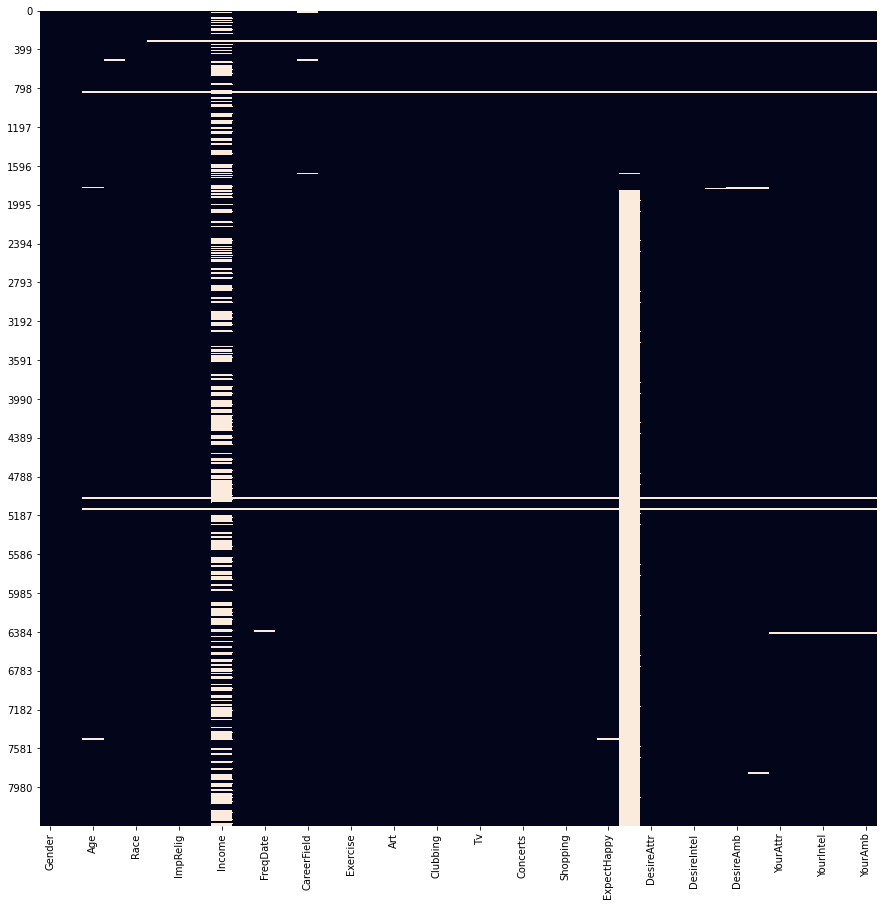

In [10]:
# Heatmap to have an overview of the number of null values in each feature
null_heatmap = sns.heatmap(dating_df.isnull(), cbar=False)
null_heatmap.figure.set_size_inches(15, 15)

There looks to be null values across almost all of the features. However, ExpNum and Income seem to have the highest number of null values.

In [11]:
# Retrieve the specific number of null values in each feature
null_features = dating_df.isnull().sum()
for key, value in null_features.iteritems():
    print("{:15s}{}".format(key, value))

Gender         0
Match          0
Age            95
StudyField     82
Race           63
ImpRace        79
ImpRelig       79
From           79
Income         4099
Goal           79
FreqDate       97
FreqGoOut      79
CareerField    138
Sports         79
Exercise       79
Dining         79
Art            79
Gaming         79
Clubbing       79
Reading        79
Tv             79
Movies         79
Concerts       79
Music          79
Shopping       79
Yoga           79
ExpectHappy    101
ExpectNum      6578
DesireAttr     79
DesireSinc     79
DesireIntel    79
DesireFun      89
DesireAmb      99
DesireShar     121
YourAttr       105
YourSinc       105
YourIntel      105
YourFun        105
YourAmb        105


Features with too many null values, even when filled in, will give an inaccurate representation of the data because the filled in data would only be based on the small remaining amount of data available. However, Income will be important and I suspect will have a strong correlation with the matching rate. Thus, only ExpNum will be removed.

In [12]:
dating_df.drop('ExpectNum', axis=1, inplace=True)

In [13]:
# For Age, I will replace the null values with the mean age
dating_df['Age'].fillna(dating_df['Age'].mean(), inplace=True)

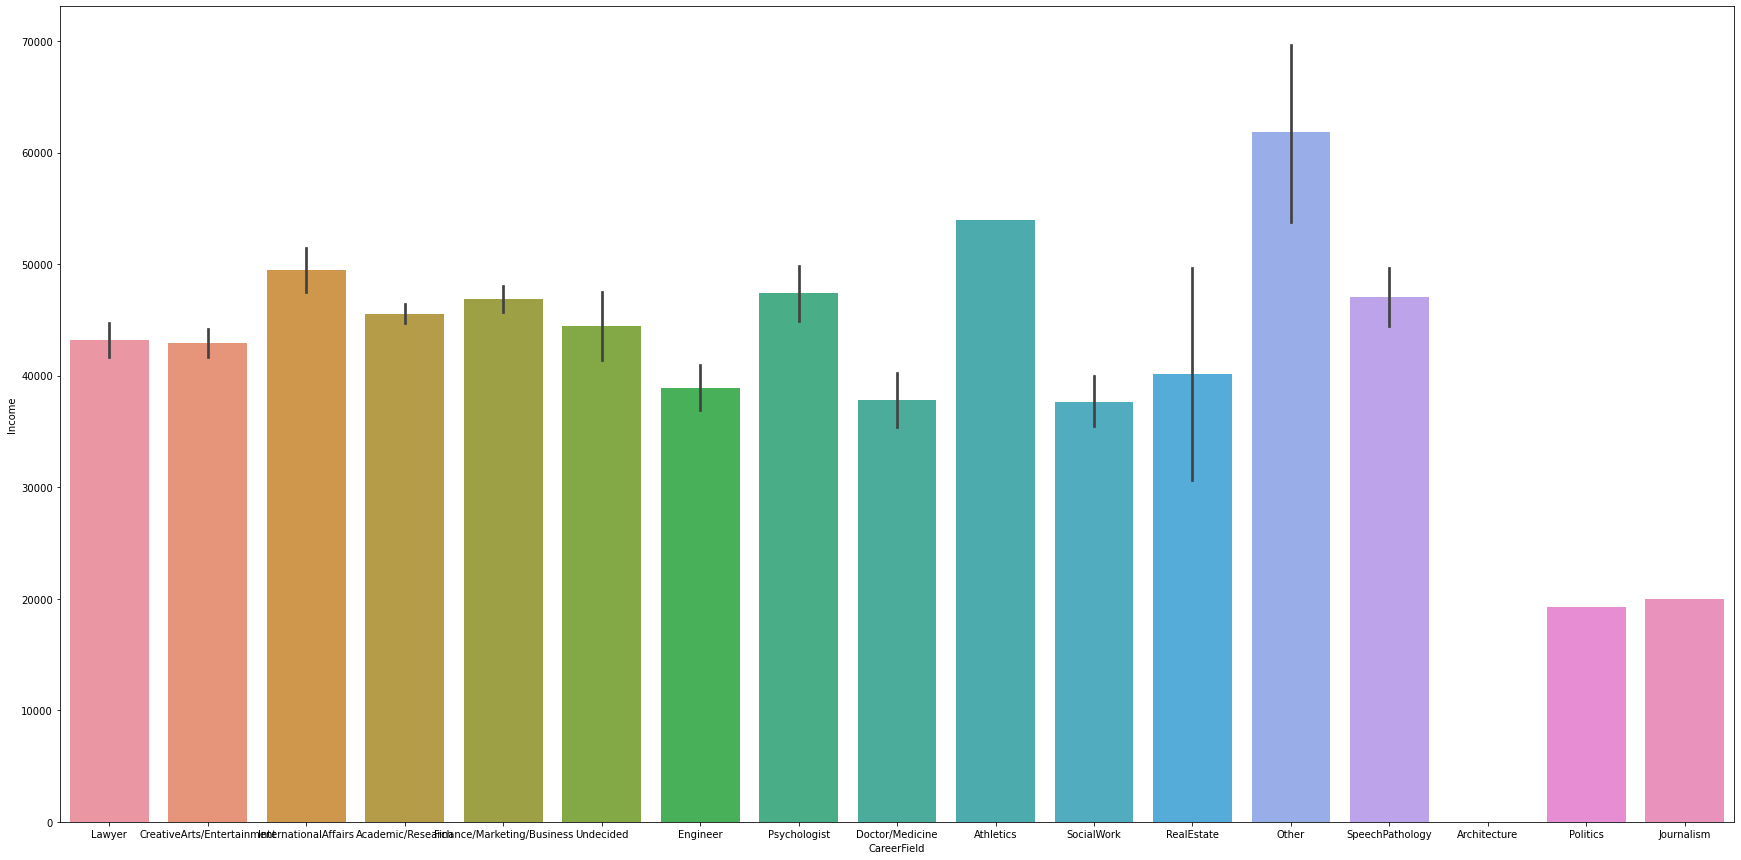

In [14]:
# Clean Income values
dating_df['Income'] = dating_df['Income'].apply(lambda x: str(x).replace(',', ''))

# Convert Income to float type
dating_df['Income'] = dating_df['Income'].astype(float)

# Display correlation between CareerField and Income
sns.barplot(x='CareerField', y='Income', data=dating_df).figure.set_size_inches(30, 15)

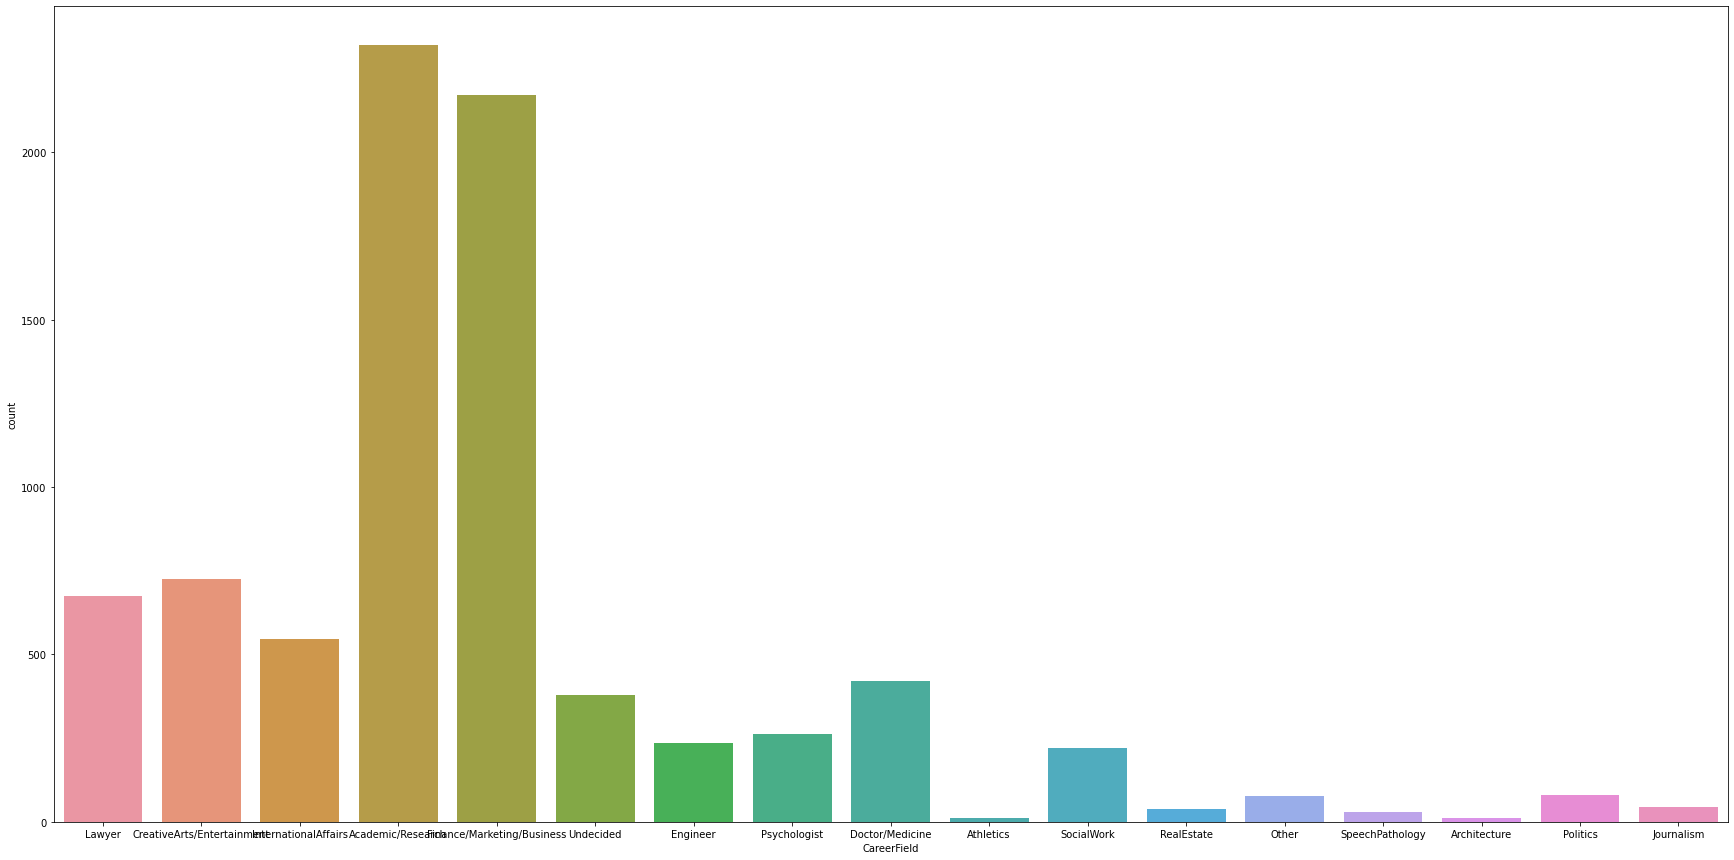

In [15]:
# Distribution of participants based on their career fields
sns.countplot(x='CareerField', data=dating_df).figure.set_size_inches(30, 15)

The distribution of participants based on their career fields is very skewed, with most participants having pursued a career in Academic/Research, followed by Finance/Marketing/Business. The number of participants in other careers are substantially lower than the two mentioned careers. Thus, the Income distribution for many careers are not representative and therefore, I won't be using CareerField to estimate missing Income of participants.

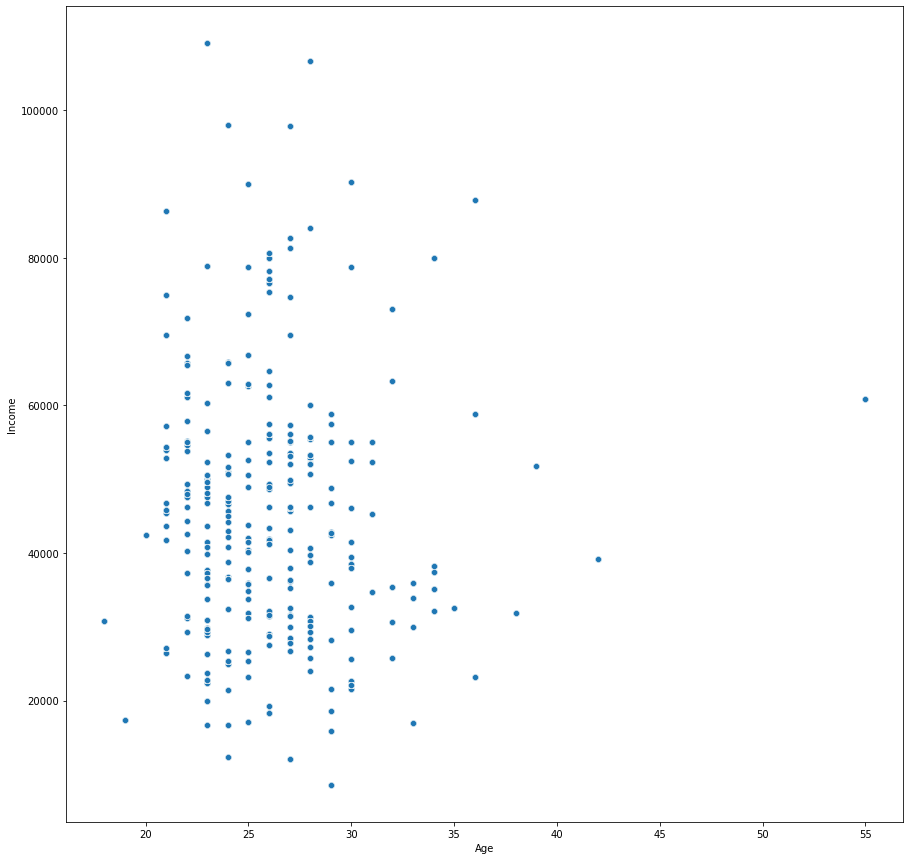

In [16]:
# Correlation between Age and Income
sns.scatterplot(x='Age', y='Income', data=dating_df).figure.set_size_inches(15, 15)

Because most participants are from 22 to 35 years of age, the highest number of data points reside in that range. The range of income of people in that age range also have good representation with a wide distribution of income. Therefore, for people from 22 to 35, I will estimate their missing Incomes by using the mean Income of people of the same age. Income of people in other age groups will be estimated using the mean Income of the entire dataset. 

In [17]:
# Mean income of entire dataset
mean_income = dating_df['Income'].mean()

# Convert values in Age to integers
dating_df['Age'] = dating_df['Age'].astype(int)

# Fill in the missing Incomes based on age
for index, row in dating_df.iterrows():
    if np.isnan(row['Income']):
        if row['Age'] >= 22 and row['Age'] <= 35:
            dating_df.at[index, 'Income'] = dating_df.loc[(dating_df['Age'] == row['Age']), 'Income'].mean()
        else:
            dating_df.at[index, 'Income'] = mean_income


For the rest of the features, the number of missing values claim a much smaller proportion of the overall data, therefore, I will fill the null values by traditional means. The mean for quantitative/numerical values and the mode for categorical values.

In [18]:
# Fill in the missing values for the rest of the features
for column in dating_df:
    if dating_df[column].dtype == object:
        dating_df[column].fillna(dating_df[column].mode()[0], inplace=True)
    
    elif dating_df[column].dtype != object:
        dating_df[column].fillna(dating_df[column].mean(), inplace=True)


In [19]:
# Check for any remaining missing values in the dataset
null_features = dating_df.isnull().sum()
for key, value in null_features.iteritems():
    print("{:15s}{}".format(key, value))

Gender         0
Match          0
Age            0
StudyField     0
Race           0
ImpRace        0
ImpRelig       0
From           0
Income         0
Goal           0
FreqDate       0
FreqGoOut      0
CareerField    0
Sports         0
Exercise       0
Dining         0
Art            0
Gaming         0
Clubbing       0
Reading        0
Tv             0
Movies         0
Concerts       0
Music          0
Shopping       0
Yoga           0
ExpectHappy    0
DesireAttr     0
DesireSinc     0
DesireIntel    0
DesireFun      0
DesireAmb      0
DesireShar     0
YourAttr       0
YourSinc       0
YourIntel      0
YourFun        0
YourAmb        0


## Exploratory Data Analysis

I will be exploring the features of the dataset and observe correlations between features and what stories they tell about the data. I will divide this section based on the features that I will be analyzing, one by one.

### Gender

,Match
Gender,
Female,0.164914
Male,0.164521


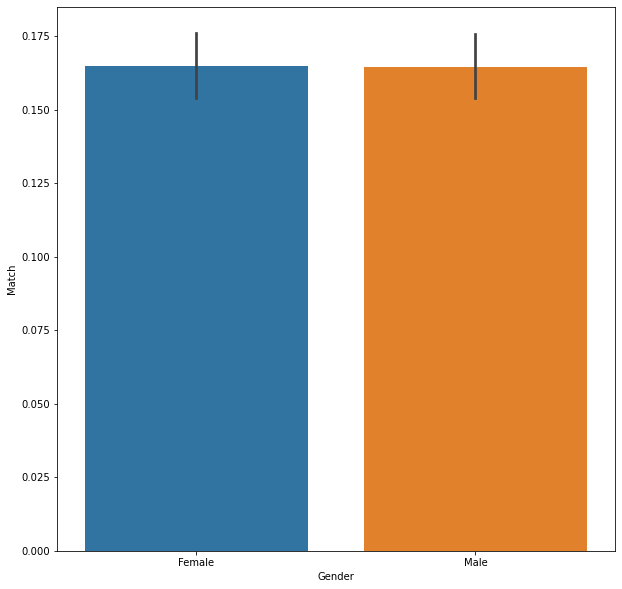

In [20]:
# Gender and Matching Rate
sns.barplot(x='Gender', y='Match', data=dating_df).figure.set_size_inches(10, 10)
pd.pivot_table(dating_df, index='Gender', values=['Match'])

Males and Females look to have almost the same matching rate. Gender have almost no significance when it comes to the matching rate.

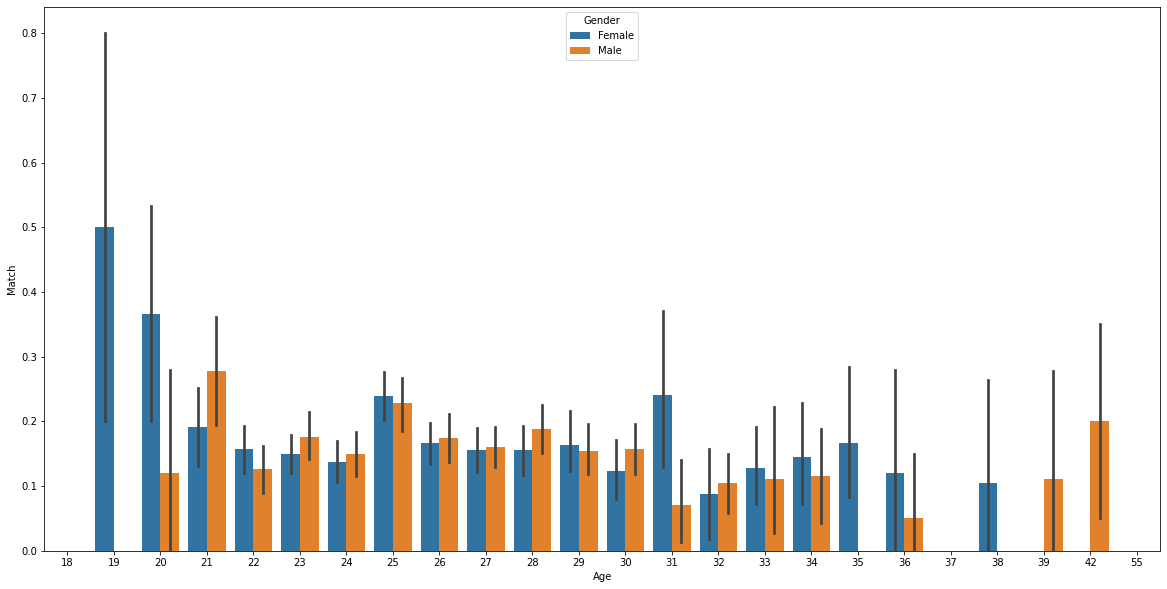

In [21]:
# (Age, Gender) and Matching Rate
sns.barplot(x='Age', y='Match', hue='Gender', data=dating_df).figure.set_size_inches(20, 10)

* Under 21: Mostly female participants and matching rates are much higher for females.
* 21-30: Roughly equal number of male and female participants. Males have overall higher matching rates compared to females.
* 31-38: More female than male participants. Females have overall much higher matching rates compared to males.
* Above 38: All male participants.

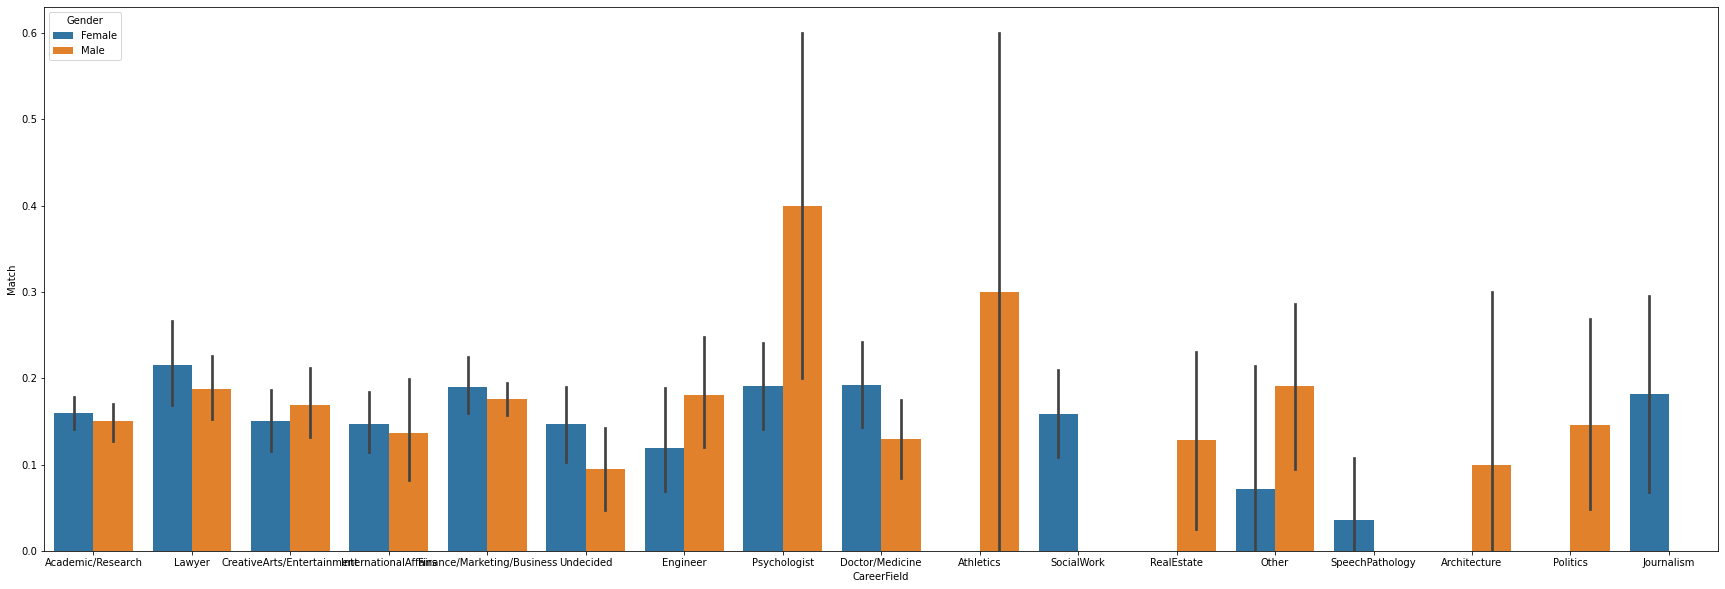

In [22]:
# (CareerField, Gender) and Matching Rate
sns.barplot(x='CareerField', y='Match', hue='Gender', data=dating_df).figure.set_size_inches(30, 10)

* For Males: Psychologist and Athletics have the highest matching rates by far.
* For Females: Lawyer have the highest matching rates, followed by Finance/Marketing/Business, Psychologist and Doctor/Medicine.

In [23]:
# Gender and Desired attributes
pd.pivot_table(dating_df, index='Gender', values=['DesireAttr', 'DesireSinc', 'DesireIntel', 'DesireFun', 'DesireAmb', 'DesireShar'])

,DesireAmb,DesireAttr,DesireFun,DesireIntel,DesireShar,DesireSinc
Gender,,,,,,
Female,12.796979,18.118108,17.151660,20.992111,12.687563,18.292196
Male,8.573141,26.900673,17.761698,19.540847,11.004667,16.502718


When looking for a partner,
* For Females: Intelligence is the most desirable trait, followed by Sincerity and Attractiveness.
* For Males: Attractiveness is by far, the most desirable trait, scoring a much higher point compared to the other traits. This is followed by Intellignece and Fun.

In [24]:
# Gender and Self-rated attributes
pd.pivot_table(dating_df, index='Gender', values=['YourAttr', 'YourSinc', 'YourIntel', 'YourFun', 'YourAmb'])

,YourAmb,YourAttr,YourFun,YourIntel,YourSinc
Gender,,,,,
Female,7.631633,7.216940,7.890583,8.321956,8.455727
Male,7.525269,6.952842,7.518781,8.485777,8.134527


Very similar results for Males and Females, both value Intelligence and Sincerity in themselves the most.

### Age

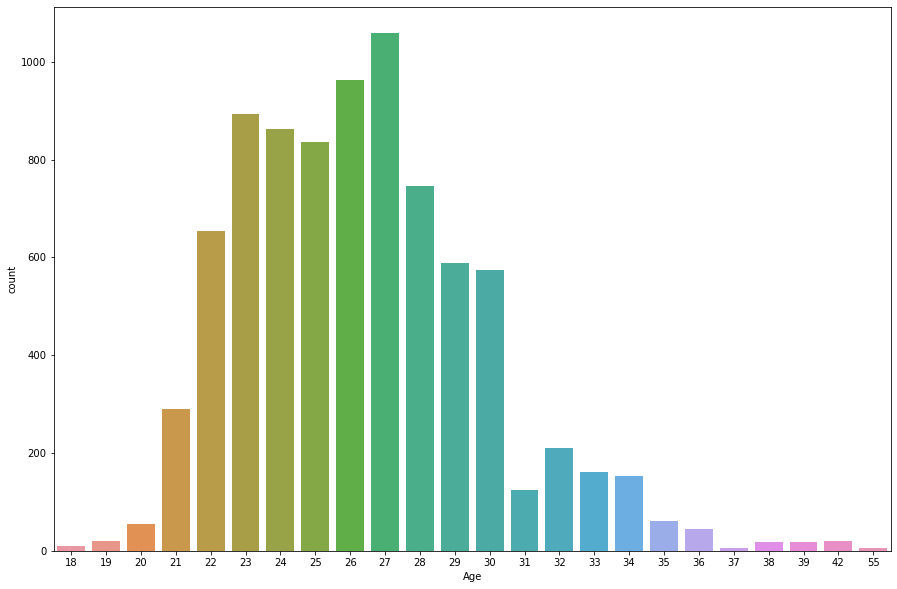

In [25]:
# Number of participants by Age
sns.countplot(x='Age', data=dating_df).figure.set_size_inches(15, 10)

The large majority of participants are of age 22 to 30. Therefore, data from people in that age range will be the most representative compared to people in other age ranges.

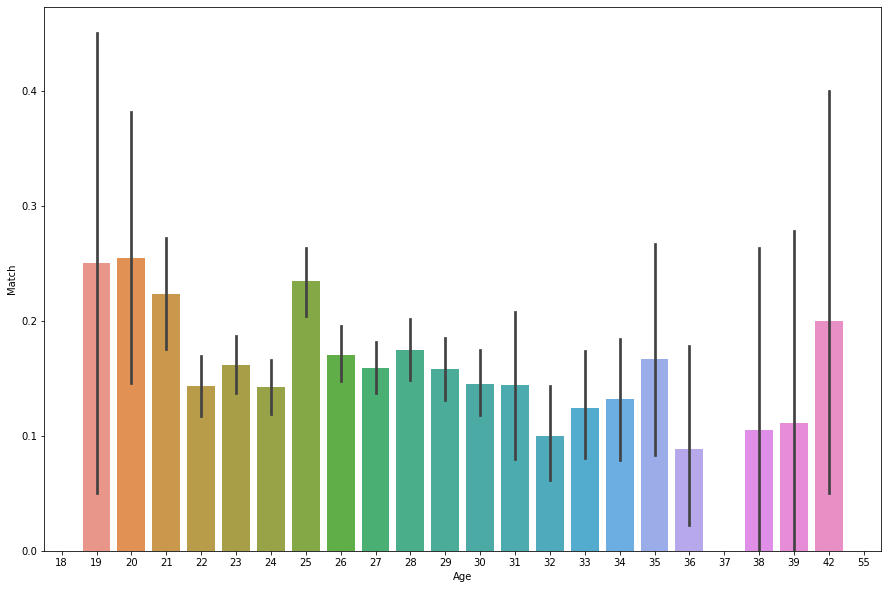

In [26]:
# Age and Matching Rate
sns.barplot(x='Age', y='Match', data=dating_df).figure.set_size_inches(15, 10)

Participants aged 19, 20 and 25 have the highest matching rates. Participants aged 22 to 31 have overall higher matching rates compared to participants aged 32 and above.

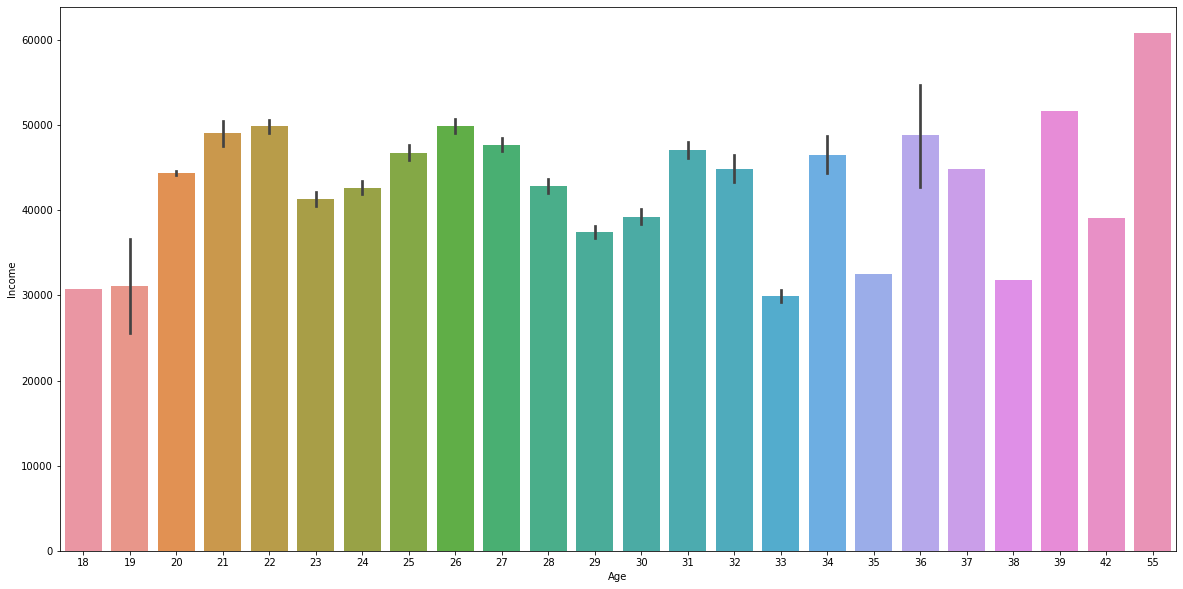

In [27]:
# Age and Income
sns.barplot(x='Age', y='Income', data=dating_df).figure.set_size_inches(20, 10)

Participants aged 18 and 19 have the lowest Income. Low Income for participants aged 33, 35 and 38 is mostly due to the dataset consisting of only a small proportion of people at those ages, therefore, the data for those people are not representative.<br>
Income rises for participants aged 20 to 22, dropping at 23 and rising again to a peak at 26. From there, Income drops again until age 29, then rises to peak at 31. People aged 32 and above only make up a small proportion of the overall data, thus, not representative.

In [28]:
# Age and Goal
pd.pivot_table(dating_df, index='Goal', values='Age')

,Age
Goal,
Experience,25.268627
FunNightOut,25.669900
GetDate,27.044374
MeetNewPeople,26.808433
Other,26.687351
SeriousRelationship,29.724252


* For younger participants, their main goals are to either enjoy the experience, or having a fun night out.
* For slightly older participants, their main goals are to meet new people, get a date or other purposes.
* For the oldest participants, their main goals are to enagage in a serious relationship with someone.

### Career Fields

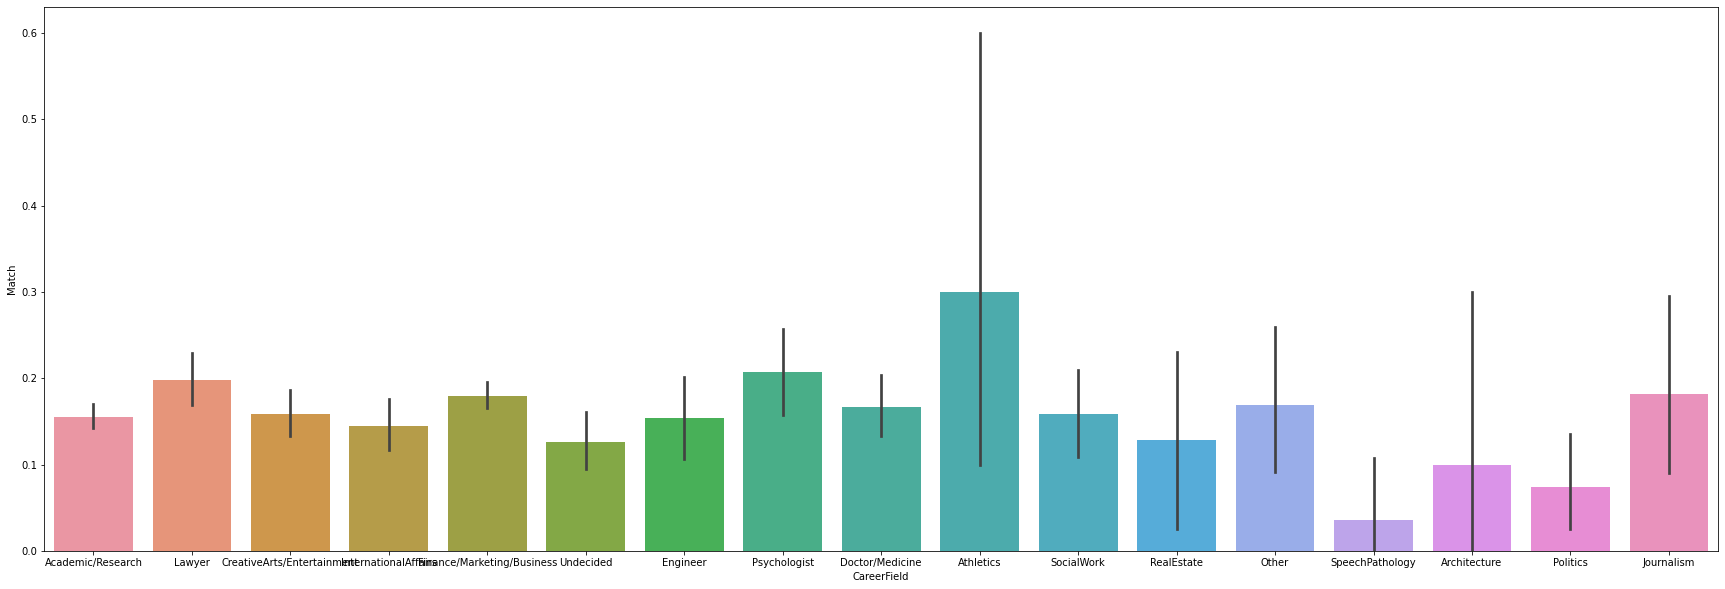

In [29]:
sns.barplot(x='CareerField', y='Match', data=dating_df).figure.set_size_inches(30, 10)

Participants in Athletics careers have the highest matching rate, followed by Psychologist and Lawyer.

### Income

In [30]:
# Income and Matching Rate
pd.pivot_table(dating_df, index='Match', values='Income')

,Income
Match,
0,44355.032739
1,45156.421308


Income across people who found matches and those who didn't are very similar, though, participants who did find matches have slightly higher income on average compared to participants who didn't find any match. However, this conclusion could be caused by the large number of missing income that had to be filled in by the mean income.

### Individual Attributes

In [31]:
# Desired attributes and matching rates
pd.pivot_table(dating_df, index='Match', values=['DesireAttr', 'DesireSinc', 'DesireIntel', 'DesireFun', 'DesireAmb', 'DesireShar'])

,DesireAmb,DesireAttr,DesireFun,DesireIntel,DesireShar,DesireSinc
Match,,,,,,
0,10.694469,22.431907,17.345766,20.223607,11.979639,17.496523
1,10.622044,22.934130,18.021333,20.478626,11.162915,16.888606


Both groups of participants (those who found matches and those who didn't) rated Attractiveness as the most desirable trait, followed by Intelligence. Similarly, both also rated Ambition as the least important trait. Overall, this feature does not have much of an impact on the matching rates.

In [32]:
# Self-rated attributes and matching rates
pd.pivot_table(dating_df, index='Match', values=['YourAttr', 'YourSinc', 'YourIntel', 'YourFun', 'YourAmb'])

,YourAmb,YourAttr,YourFun,YourIntel,YourSinc
Match,,,,,
0,7.570157,7.062509,7.669554,8.401929,8.296144
1,7.620126,7.197433,7.881471,8.414286,8.288807


Participants who found matches and those who didn't, both rate their Intelligence to be their strongest trait, followed by Sincerity. Both also rated Attractiveness as their weakest trait. In general, this feature have little impact on the matching rates.

### Other

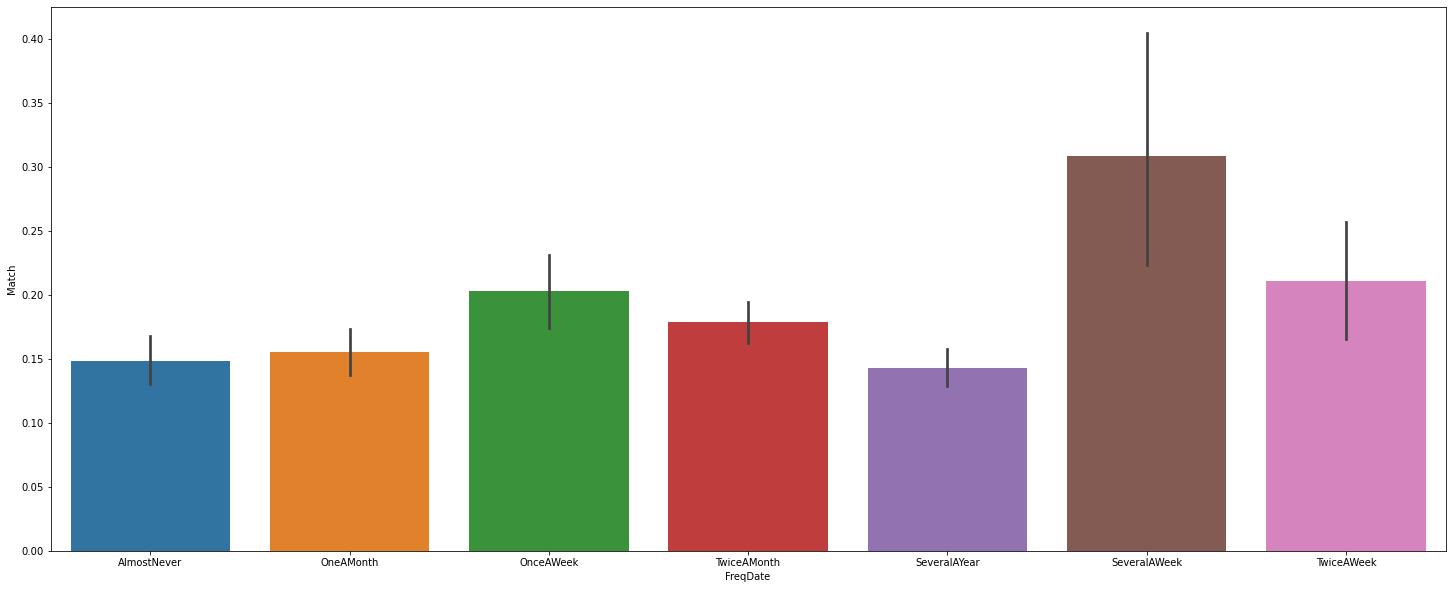

In [33]:
# Correlation between the frequency of going on dates and the matching rate
sns.barplot(x='FreqDate', y='Match', data=dating_df).figure.set_size_inches(25, 10)

Participants who went on dates once a week, twice a week or several times a week have the highest matching rates.

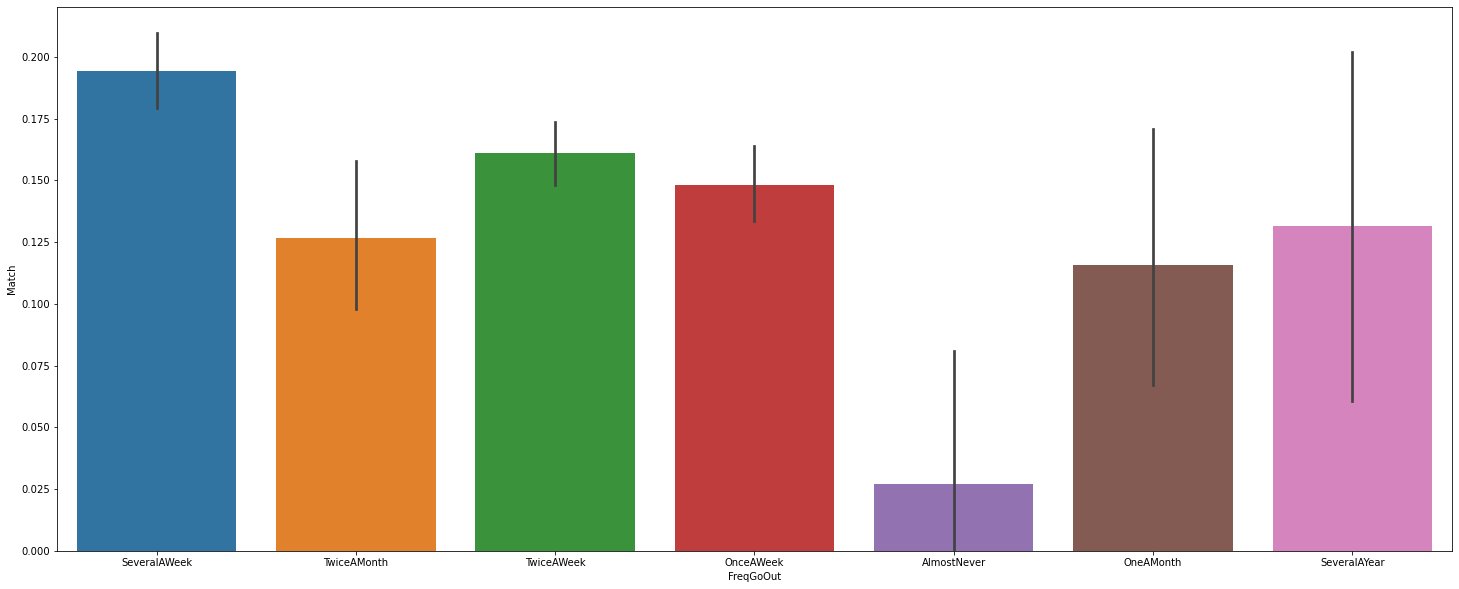

In [34]:
# Correlation between the frequency of going out and the matching rate
sns.barplot(x='FreqGoOut', y='Match', data=dating_df).figure.set_size_inches(25, 10)

Similar to the results above, participants who goes out at least once a week have the highest matching rates.

In [35]:
# Different interests and matching rates
pd.pivot_table(dating_df, index='Match', values=['Sports', 'Exercise', 'Dining', 'Art', 'Gaming', 'Clubbing', 'Reading', 'Tv', 'Movies', 'Concerts', 'Music', 'Shopping', 'Yoga'])

,Art,Clubbing,Concerts,Dining,Exercise,Gaming,Movies,Music,Reading,Shopping,Sports,Tv,Yoga
Match,,,,,,,,,,,,,
0,6.683157,5.685016,6.799775,7.757669,6.235743,3.865590,7.936819,7.832876,7.660678,5.632810,6.400288,5.320301,4.295471
1,6.873709,6.055210,6.955349,7.916491,6.296875,3.960303,7.832460,7.943309,7.768969,5.623528,6.551724,5.222146,4.560933


People who found matches and those who didn't share very similar interests. Both enjoyed Dining, Movies, Music and Reading the most and enjoyed Gaming and Yoga the least. Interests and hobbies in this dataset does not have any significant impact on the matching rates.

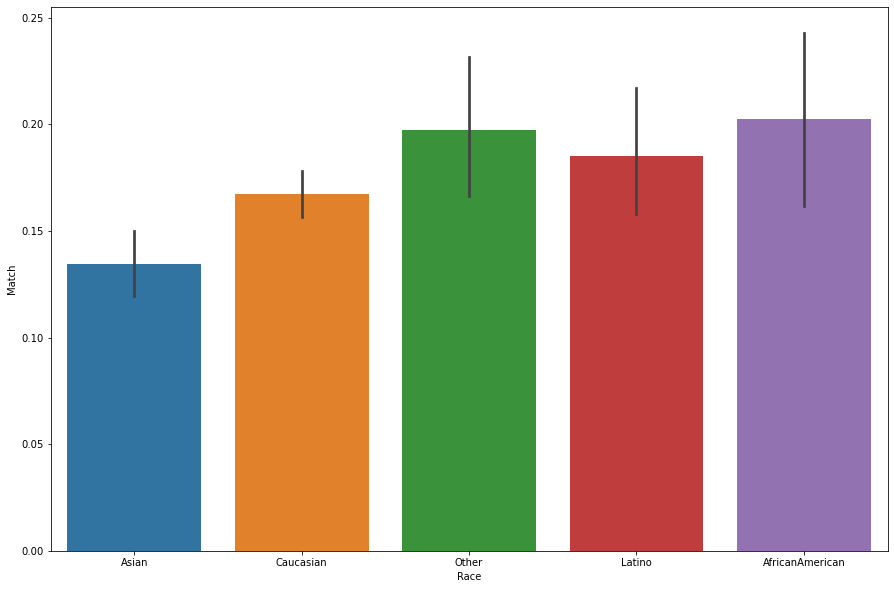

In [36]:
# Race and Matching Rates
sns.barplot(x='Race', y='Match', data=dating_df).figure.set_size_inches(15, 10)

From the dataset, Asian participants have the lowest matching rates, followed by Caucasian participants. African American participants and participants of other races have the highest matching rates.

## Data Cleaning and Preprocessing

Now that I have thoroughly explore the data, I will clean and preprocess the data appropriately in preparation for modelling. This section could include:
* Dropping irrelevant features
* Combining features
* Dealing with independent variables that have high a correlation with one another
* Extracting data from existing features to create new ones
* Transforming the distribution of values in the features
* Dealing with rare categorical values
* Binning values of different features
* Encode categorical features
* Normalizing the data

In [37]:
dating_df.head()

,Gender,Match,Age,StudyField,Race,ImpRace,ImpRelig,From,Income,Goal,...,DesireSinc,DesireIntel,DesireFun,DesireAmb,DesireShar,YourAttr,YourSinc,YourIntel,YourFun,YourAmb
0,Female,0,21,Law,Asian,2.0,4.0,Chicago,69487.0,MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
1,Female,0,21,Law,Asian,2.0,4.0,Chicago,69487.0,MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
2,Female,1,21,Law,Asian,2.0,4.0,Chicago,69487.0,MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
3,Female,1,21,Law,Asian,2.0,4.0,Chicago,69487.0,MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
4,Female,1,21,Law,Asian,2.0,4.0,Chicago,69487.0,MeetNewPeople,...,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0


In [38]:
dating_df.columns

Index(['Gender', 'Match', 'Age', 'StudyField', 'Race', 'ImpRace', 'ImpRelig',
       'From', 'Income', 'Goal', 'FreqDate', 'FreqGoOut', 'CareerField',
       'Sports', 'Exercise', 'Dining', 'Art', 'Gaming', 'Clubbing', 'Reading',
       'Tv', 'Movies', 'Concerts', 'Music', 'Shopping', 'Yoga', 'ExpectHappy',
       'DesireAttr', 'DesireSinc', 'DesireIntel', 'DesireFun', 'DesireAmb',
       'DesireShar', 'YourAttr', 'YourSinc', 'YourIntel', 'YourFun',
       'YourAmb'],
      dtype='object')

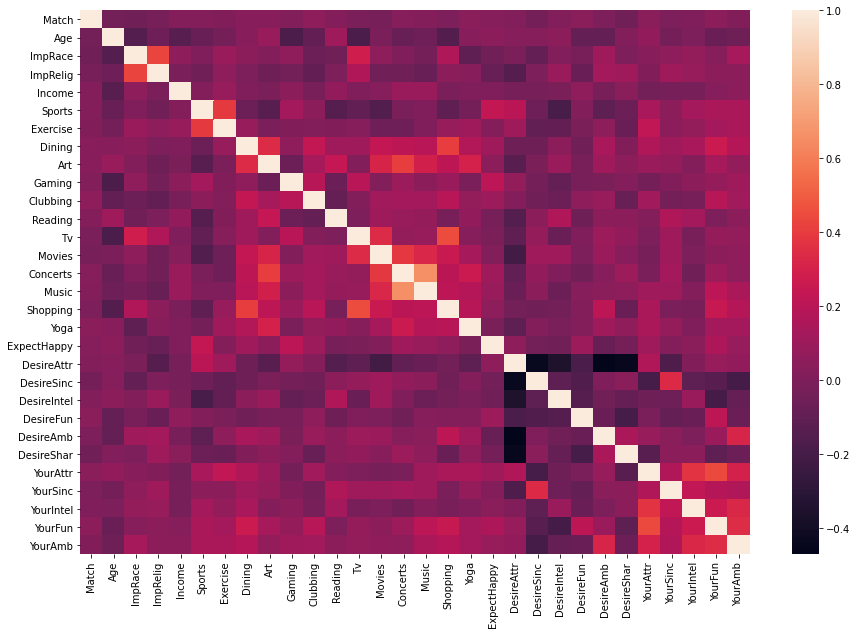

In [39]:
# Retrieve a list of quantitative features in the dataset
quantitative_features = dating_df.select_dtypes(exclude=['object'])

# Heatmap to show correlations between the quantitative features
sns.heatmap(quantitative_features.corr(), xticklabels=True, yticklabels=True).figure.set_size_inches(15, 10)

Strong negative correlations occur most between the different Desired Attributes. This is because the Attributes must add up to a maximum of 100 points, therefore, increasing the points of one attribute means that you have to decrease points in other attributes. Strong positive correlations occur most between Interests that have links to one another. For example, if a person really likes Music, they would most likely also enjoy going to Concerts.

In [40]:
# Create two new features, IndoorInterests and OutdoorInterests. Each will store the total points of indoor hobbies and outdoor hobbies respectively
dating_df['IndoorInterests'] = dating_df['Art'] + dating_df['Gaming'] + dating_df['Reading'] + dating_df['Tv'] + dating_df['Movies'] + dating_df['Music'] + dating_df['Yoga']
dating_df['OutdoorInterests'] = dating_df['Sports'] + dating_df['Exercise'] + dating_df['Dining'] + dating_df['Clubbing'] + dating_df['Movies'] + dating_df['Music'] + dating_df['Concerts'] + dating_df['Shopping']

A person that mostly enjoys Indoor hobbies will be different from another that mostly enjoys Outdoor hobbies. Therefore, based on the participant's interests/hobbies, I give each a point that conveys their overall enjoyment of indoor and outdoor activities respectively.

In [41]:
# Create a new feature, YourTotal, that stores a participant's total self-rated score
dating_df['YourTotal'] = dating_df['YourAttr'] + dating_df['YourSinc'] + dating_df['YourIntel'] + dating_df['YourFun'] + dating_df['YourAmb']

Calculate a participant's total self-rated score. If the participants are honest, then a participant with a higher score could mean that they have a higher matching rate.

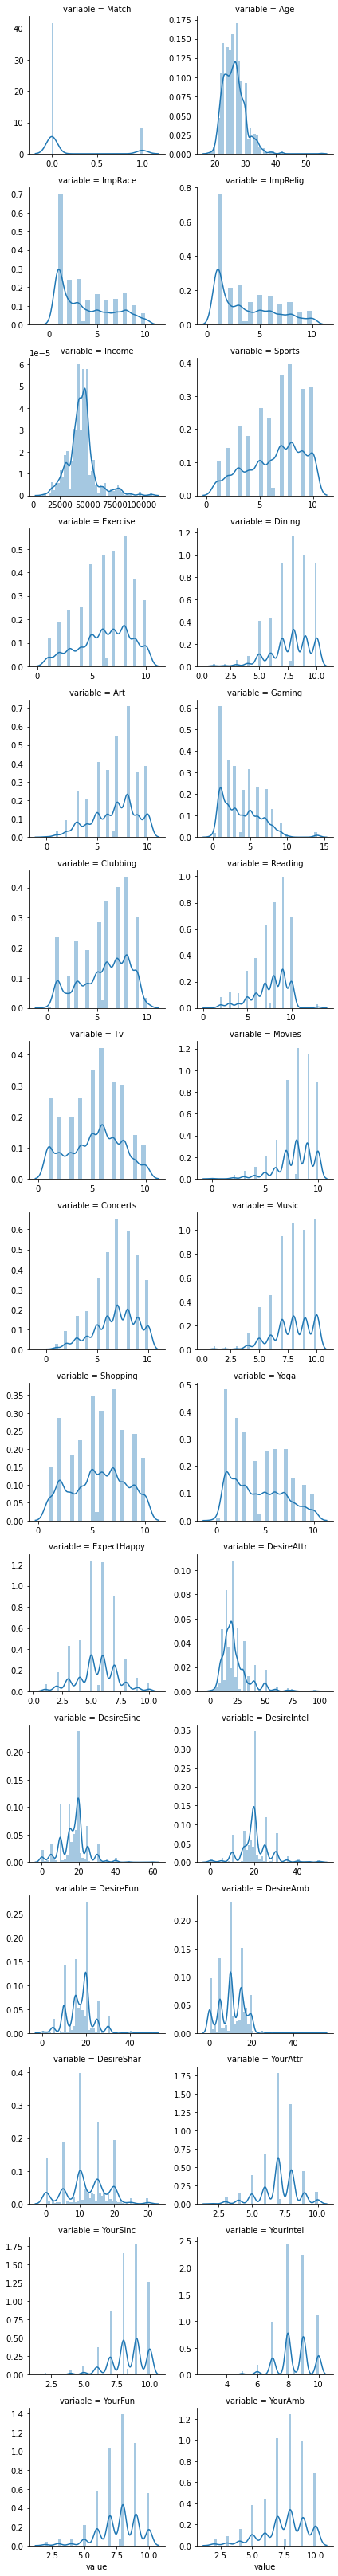

In [42]:
# Analyze the distribution of all quantitative features
quantitative_features_df = pd.melt(dating_df, value_vars=quantitative_features)
facet_grid = sns.FacetGrid(quantitative_features_df, col='variable', col_wrap=2, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.distplot, 'value')

The facet grid of the distributions of the features show that many features are left-skewed, in which I will perform a Square transformation on them. Log transformation will be applied onto right-skewed features.

In [43]:
# Log Transformation function
def log_transform(column):
    dating_df[column] = dating_df[column].apply(lambda x: np.log1p(x) if x > 0 else x)

# Square Transformation function
def square_transform(column):
    dating_df[column + "^2"] = dating_df[column] ** 2

In [44]:
# Features to be Log Transformed
log_transform_features = ['Age', 'Income', 'Gaming', 'DesireAttr', 'DesireSinc', 'DesireAmb']

# Log transform features
for feature in log_transform_features:
    log_transform(feature)
    
# Features to be Square Transformed
square_transform_features = ['Dining', 'Movies', 'Music', 'YourSinc', 'YourIntel']

# Square transform features
for feature in square_transform_features:
    square_transform(feature)

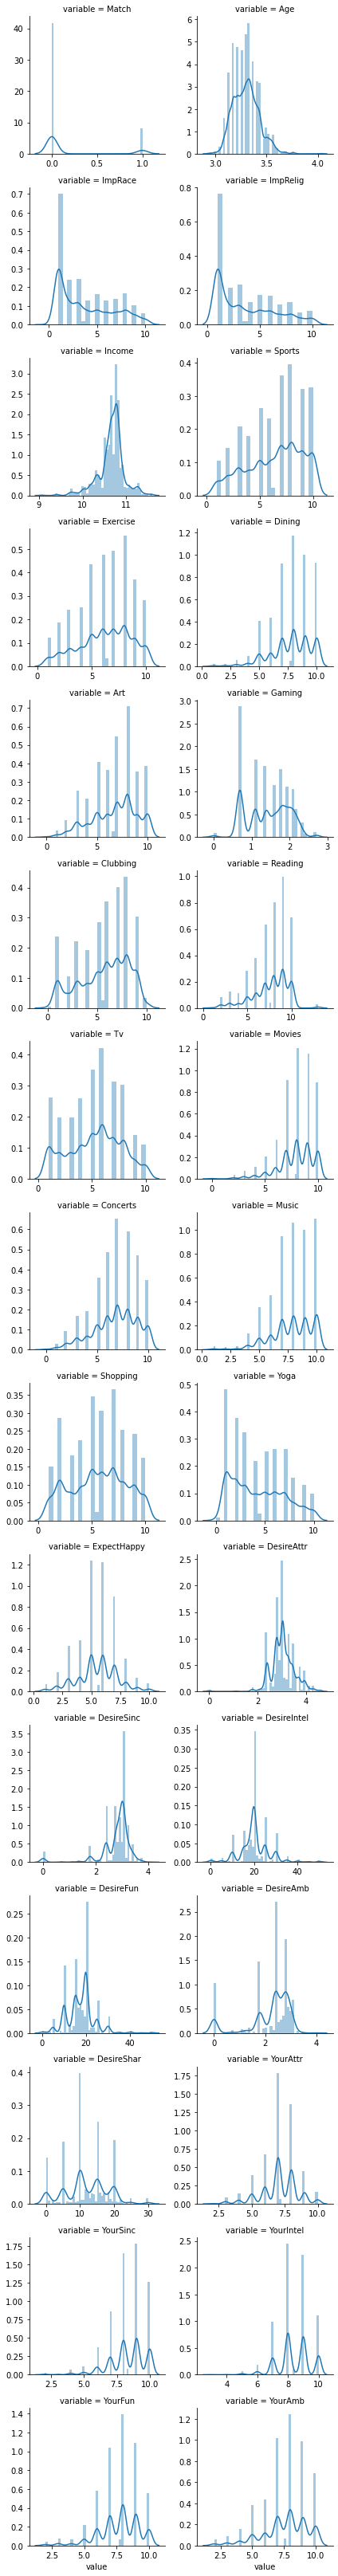

In [45]:
# Observe the distribution of all quantitative features after transformation
quantitative_features_df = pd.melt(dating_df, value_vars=quantitative_features)
facet_grid = sns.FacetGrid(quantitative_features_df, col='variable', col_wrap=2, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.distplot, 'value')

After the transformations, some features still needed to be transformed once more to make it normal.

In [46]:
square_transform('DesireAttr')
square_transform('DesireSinc')
square_transform('DesireAmb')

In [47]:
# Assign rare categorical values of each categorical feature to a class called Other
for feature in dating_df:
    if dating_df[feature].dtype == object:
        frequencies = dating_df[feature].value_counts(normalize=True)
        mapping = dating_df[feature].map(frequencies)
        dating_df[feature].mask(mapping < 0.001, 'Other', inplace=True)
        
dating_df.head(10)

,Gender,Match,Age,StudyField,Race,ImpRace,ImpRelig,From,Income,Goal,...,OutdoorInterests,YourTotal,Dining^2,Movies^2,Music^2,YourSinc^2,YourIntel^2,DesireAttr^2,DesireSinc^2,DesireAmb^2
0,Female,0,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248
1,Female,0,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248
2,Female,1,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248
3,Female,1,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248
4,Female,1,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248
5,Female,0,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248
6,Female,0,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248
7,Female,0,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248
8,Female,1,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248
9,Female,0,3.091042,Law,Asian,2.0,4.0,Chicago,11.148909,MeetNewPeople,...,68.0,37.0,81.0,100.0,81.0,64.0,64.0,7.687248,9.269117,7.687248


Replace categorical values that appear less than 1% in each categorical feature with a class called Other.

In [48]:
# Encode the categorial features using One Hot Encoding
dating_df = pd.get_dummies(dating_df)

# Remove all duplicated columns
dating_df = dating_df.loc[:, ~dating_df.columns.duplicated()]
dating_df.head(10)

,Match,Age,ImpRace,ImpRelig,Income,Sports,Exercise,Dining,Art,Gaming,...,CareerField_InternationalAffairs,CareerField_Journalism,CareerField_Lawyer,CareerField_Other,CareerField_Politics,CareerField_Psychologist,CareerField_RealEstate,CareerField_SocialWork,CareerField_SpeechPathology,CareerField_Undecided
0,0,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0
1,0,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0
2,1,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0
3,1,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0
4,1,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0
5,0,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0
6,0,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0
7,0,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0
8,1,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0
9,0,3.091042,2.0,4.0,11.148909,9.0,8.0,9.0,1.0,0.693147,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Save the preprocessed dataset
dating_df.to_csv("datasets/speed_dating_preprocessed.csv")

## Modelling

Now that the data has been cleaned and preprocessed, I will create a model to predict the matching rate of a person given the inputs.

In [50]:
# Import all required libraries for the modelling process
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [51]:
# Retrieve the preproccessed dataset
dating_df = pd.read_csv("datasets/speed_dating_preprocessed.csv")

In [52]:
# Seperate the independent and dependent variables into X and y
X = dating_df.drop('Match', axis=1)
y = dating_df['Match']

In [53]:
# Split X and y into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Normalize the training and testing datasets
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[ 0.23625728,  0.2239902 , -0.6244089 , ..., -0.17293287,
        -0.05994009, -0.21390903],
       [ 1.64426615, -0.66862952,  1.81974965, ..., -0.17293287,
        -0.05994009, -0.21390903],
       [-0.74541731,  0.50038274, -0.6244089 , ..., -0.17293287,
        -0.05994009, -0.21390903],
       ...,
       [-0.96820871, -1.32537471,  1.12141864, ..., -0.17293287,
        -0.05994009, -0.21390903],
       [-0.21997363, -1.32537471,  1.47058415, ..., -0.17293287,
        -0.05994009, -0.21390903],
       [-0.8576321 ,  0.2239902 , -0.6244089 , ..., -0.17293287,
        -0.05994009, -0.21390903]])

For this project, I will be building a Logistic Regression model from scratch, calling it a Logistic Regressor model (to differentiate between it and sklearn's LogisticRegression model). This model will include all of the methods for computing and optimizing the weights and bias using gradient descent, predicting and outputting classification results and outputting probability results.

In [55]:
# Create a class for the Logistic Regressor model
class LogisticRegressor:
    """ Includes all methods for computing and optimizing the weights and bias, predicting the binary values and probability values for the target feature """
    
    def __init__(self, learning_rate=0.001, num_iters=1000):
        # Initializing the parameters and values
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.weights = None
        self.bias = 0
        
    def fit(self, x, y):
        num_row = x.shape[0]
        num_col = x.shape[1]
        
        # Initialize the default weights
        self.weights = np.zeros(num_col)
        
        # Run Gradient Descent to get the best, most optimized weights and bias
        self.gradient_descent(x, y, num_row)
        
    def gradient_descent(self, x, y, num_row):
        # Loop based on the number of iterations used
        for i in range(self.num_iters):
            # Calculate the y prediction values, using the linear model equation
            y_pred = np.dot(x, self.weights) + self.bias
            # Transform the y values to values in range of 0 to 1, using the sigmoid function
            y_pred = self.sigmoid(y_pred)
            
            # Calculate the gradients for the weights and the bias
            d_weights = (1 / num_row) * np.dot(x.T, (y_pred - y))
            d_bias = (1 / num_row) * np.sum(y_pred - y)
            
            # Update the weights and bias using the gradients and the learning rate
            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias
            
    def sigmoid(self, x):
        # Perform the sigmoid function on x
        return 1 / (1 + np.exp(-x))
    
    def predict(self, x):
        # Calculate the prediction values for y
        y_pred = np.dot(x, self.weights) + self.bias
        y_pred = self.sigmoid(y_pred)
        # Convert the values into binary values of 0 or 1, and output the results
        return np.array([1 if val > 0.5 else 0 for val in y_pred])
    
    def predict_proba(self, x):
        # Calculate the prediction values for y
        y_pred = np.dot(x, self.weights) + self.bias
        # Return the probability values
        return np.array(self.sigmoid(y_pred))
    

In [56]:
# Create an instance of the model and fit it using the training datasets
clf = LogisticRegressor()
clf.fit(X_train, y_train)

<ipython-input-55-088aff02a7c7>:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [57]:
# Use the model to predict the target values for the testing dataset
y_pred = clf.predict(X_test)

# Output the probability values
clf.predict_proba(X_test)

<ipython-input-55-088aff02a7c7>:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


array([0., 0., 0., ..., 0., 0., 0.])

## Evaluation

Evaluate the performance of the model by calculating the F1-score and the Accuracy score of the model.

In [58]:
from sklearn import metrics

In [59]:
print("F1-score: ", metrics.f1_score(y_test, y_pred, average='weighted'))
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))

F1-score:  0.7637293494095403
Accuracy score:  0.837708830548926


The model yielded a decent score. Including more features from the original dataset in this dataset could increase the model's performance. Additonally, I could tweak the model's parameters and test out different combinations in order to find a one that yields the best performance. However, for this project, I have chosen a set of parameters that balanced performance and training speed.